# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crx-uci-ml-repository/crx.data


# Import Dataset

In [2]:
data = '/kaggle/input/crx-uci-ml-repository/crx.data'
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


***Note :*** in this dataset, the features used are numbers to protect the confidentiality of data. however, in this case, we used the name of the feature to make it easier to explain

In [48]:
df.columns = ['Sex','Age','Debt','Married','BankCustomer','Citizen',
'Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore',
'DriversLicense','EducationLevel','ZipCode','Income','Approved']
df.head()

,Sex,Age,Debt,Married,BankCustomer,Citizen,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,EducationLevel,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


# Preprocessing

## Check Missing Values

In [6]:
df.isna().sum()

Sex               0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

***Nothing Missing Value***, But, lets check again.

In [7]:
# check labels one of features
df.BankCustomer.unique()
# check frequency distribution of values in Education_level variable

df.BankCustomer.value_counts()

g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64

***Note*** it turns out that there is a missing value "?", now we change the "?" to be "nan

In [8]:
df.replace('?',np.nan, inplace = True)

## Re-Check Missing Value.

In [9]:
# check missing values in categorical variables
null_col = df.columns[df.isna().any()]

null_df = df[null_col].isna().sum().rename('missing rows').to_frame()
null_df['percentage'] = round(null_df['missing rows'] / df.shape[0] * 100, 2)
null_df['percentage'] = null_df['percentage'].astype('str')

null_df.sort_values('missing rows', ascending=False).style.background_gradient('Blues')

,missing rows,percentage
ZipCode,13,1.88
Sex,12,1.74
Age,12,1.74
EducationLevel,9,1.3
Ethnicity,9,1.3
Married,6,0.87
BankCustomer,6,0.87


***Note*** : There is a missing value. Because it is ***less than*** 5%, we will ***drop*** the missing value.

In [10]:
# Drop Missing Value
df.dropna(inplace=True)
df.isna().sum()

Sex               0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

***Handling Missing Value Cleared***

## Check Duplicated Data

In [11]:
df.duplicated().sum()

0

***Note :*** Nothing Duplicated Data

In [12]:
#Converting type of Age to float
df['Age'] = df['Age'].astype(float)

# Exporatory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             653 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefault    653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    object 
 14  Income          653 non-null    int64  
 15  Approved        653 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.7+ KB


In [14]:
df1 = df.groupby(['Approved']).count()['Sex'].reset_index()
df1.columns = ['Approved','Count']
df1.head()

,Approved,Count
0,+,296
1,-,357


In [15]:
df1['Total'] = df1['Count'].sum()
df1['Percentage'] = round((df1['Count']/df1['Total']*100),2)
df1

,Approved,Count,Total,Percentage
0,+,296,653,45.33
1,-,357,653,54.67


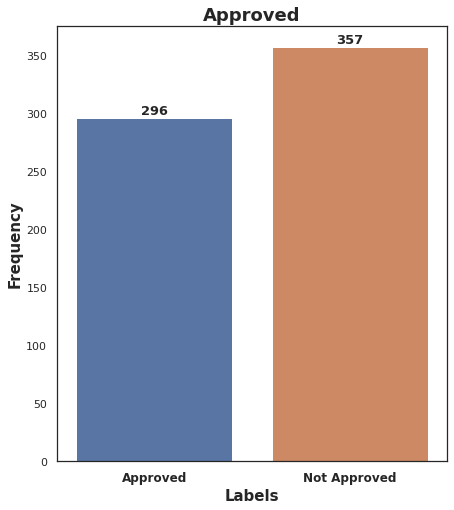

In [16]:
sns.set(style="white")

# membuat bar chart
plt.figure(figsize = (7, 8))
ax = sns.barplot(
    x = 'Approved',
    y = 'Count',
    data = df1)
ax.set_xticklabels(['Approved','Not Approved'], fontsize = 12, fontweight = 'semibold')

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Approved', fontsize = 18, fontweight = 'bold')
plt.xlabel('Labels', fontsize = 15, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points')

In [17]:
df.head()

,Sex,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [34]:
df2 = df[['Employed','Approved','Married']].groupby(['Employed','Approved']).count().reset_index()
df2.columns = ['Employed','Approved','Count']
df2

,Employed,Approved,Count
0,f,+,93
1,f,-,273
2,t,+,203
3,t,-,84


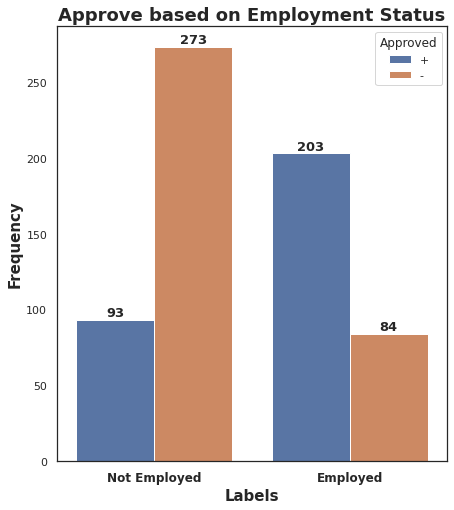

In [38]:
sns.set(style="white")

# membuat bar chart
plt.figure(figsize = (7, 8))
ax = sns.barplot(
    x = 'Employed',
    y = 'Count',
    hue = 'Approved',
    data = df2)
ax.set_xticklabels(['Not Employed','Employed'], fontsize = 12, fontweight = 'semibold')

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Approve based on Employment Status', fontsize = 18, fontweight = 'bold')
plt.xlabel('Labels', fontsize = 15, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points')

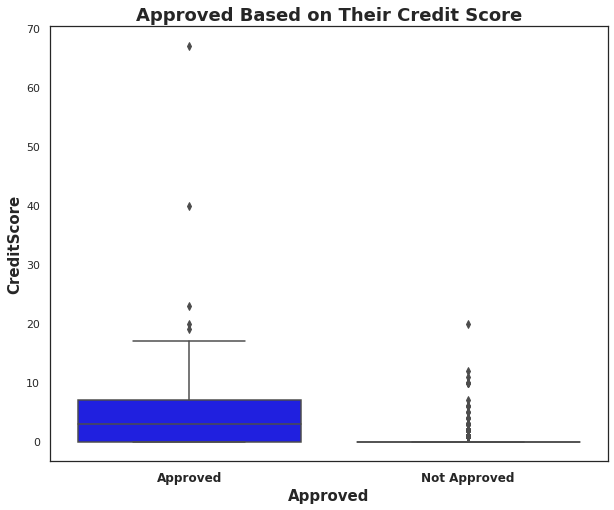

In [20]:
# membuat box plot
plt.figure(figsize = (10, 8))
ax = sns.boxplot(
    x = 'Approved',
    y = 'CreditScore',
    data = df,
    palette = ['blue', 'red']
)
ax.set_xticklabels(['Approved','Not Approved'], fontsize = 12, fontweight = 'semibold')
# Menambahkan title
plt.title('Approved Based on Their Credit Score', fontsize = 18, fontweight = 'bold')


# memberi nama xlabel & ylabel
plt.xlabel('Approved', fontsize = 15, fontweight = 'bold')
plt.ylabel('CreditScore', fontsize = 15, fontweight = 'bold');

In [41]:
df3 = df.copy()
df3 = df3[df3['Income']<60000]

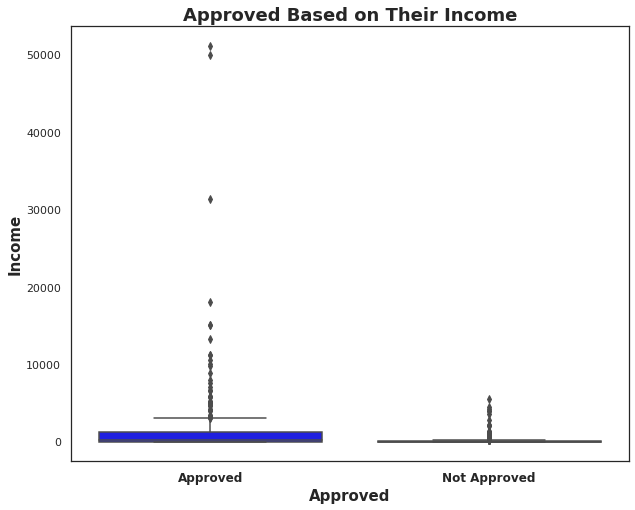

In [42]:
# membuat box plot
plt.figure(figsize = (10, 8))
ax = sns.boxplot(
    x = 'Approved',
    y = 'Income',
    data = df3,
    palette = ['blue', 'red']
)
ax.set_xticklabels(['Approved','Not Approved'], fontsize = 12, fontweight = 'semibold')
# Menambahkan title
plt.title('Approved Based on Their Income', fontsize = 18, fontweight = 'bold')


# memberi nama xlabel & ylabel
plt.xlabel('Approved', fontsize = 15, fontweight = 'bold')
plt.ylabel('Income', fontsize = 15, fontweight = 'bold');

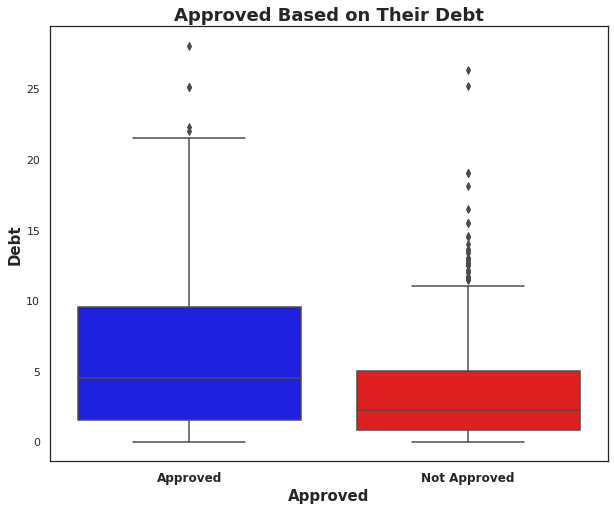

In [55]:
# membuat box plot
plt.figure(figsize = (10, 8))
ax = sns.boxplot(
    x = 'Approved',
    y = 'Debt',
    data = df,
    palette = ['blue', 'red']
)
ax.set_xticklabels(['Approved','Not Approved'], fontsize = 12, fontweight = 'semibold')
# Menambahkan title
plt.title('Approved Based on Their Debt', fontsize = 18, fontweight = 'bold')


# memberi nama xlabel & ylabel
plt.xlabel('Approved', fontsize = 15, fontweight = 'bold')
plt.ylabel('Debt', fontsize = 15, fontweight = 'bold');

# Feature Encoding

In [56]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns.values:
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [57]:
df.head()

,Sex,Age,Debt,Married,BankCustomer,Citizen,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,EducationLevel,ZipCode,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,94,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0


# Feature Selection

In [58]:
df_use = df.copy()
df_use = df_use.drop(['DriversLicense', 'ZipCode'],axis = 1)
df_use.head()

,Sex,Age,Debt,Married,BankCustomer,Citizen,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,EducationLevel,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0


# Split Data

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X = df_use.drop(['Approved'],axis = 1)
y = df_use['Approved']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

# Standar Scaler

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modelling

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [87]:
model = {'Gaussian NB' : GaussianNB(),
         'XGBoost' : XGBClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Ada Boost':AdaBoostClassifier(),
         'LogReg':LogisticRegression()
         }
result={}
Accuracy = []
Precision = []
Recall = []
for key,value in model.items():
    
    model = value
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    F1 = f1_score(y_test, y_pred)
    result[key]= F1
    
    Accuracy.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))


base_model = pd.DataFrame(result.items(), columns=['Base Model', 'F1_Score'])
base_model['Accuracy']=Accuracy
base_model['Precision']=Precision
base_model['Recall']=Recall
base_model

[13:58:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Base Model,F1_Score,Accuracy,Precision,Recall
0,Gaussian NB,0.854701,0.826531,0.806452,0.909091
1,XGBoost,0.841629,0.821429,0.837838,0.845455
2,Decision Tree,0.821429,0.795918,0.807018,0.836364
3,Ada Boost,0.839286,0.816327,0.824561,0.854545
4,LogReg,0.857143,0.846939,0.900000,0.818182


In [88]:
selected_model = base_model[base_model['Precision']>0.85]
selected_model

,Base Model,F1_Score,Accuracy,Precision,Recall
4,LogReg,0.857143,0.846939,0.9,0.818182
